**Adding Library Files**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Here We Will be reading the dataset Which is in the CSV format**

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes = pd.read_csv("//content//drive/MyDrive//Diabetes prediction //diabetes prediction.csv")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

**Exploratory Data Analysis (EDA)**

Now let’ see that what are columns available in our dataset.

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Information about the dataset**

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
# number of rows and column in this dataset
diabetes.shape

(2000, 9)

**To know more about the dataset**

In [ ]:
diabetes.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

**To gain further insight into the dataset involving transpose, where T represents the transpose operation.**

In [ ]:
diabetes.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

**Now, let us examine the quantity of null values present in our dataset.**

In [ ]:
diabetes.isnull().head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        False    False          False          False    False  False   
1        False    False          False          False    False  False   
2        False    False          False          False    False  False   
3        False    False          False          False    False  False   
4        False    False          False          False    False  False   
5        False    False          False          False    False  False   
6        False    False          False          False    False  False   
7        False    False          False          False    False  False   
8        False    False          False          False    False  False   
9        False    False          False          False    False  False   

   DiabetesPedigreeFunction    Age  Outcome  
0                     False  False    False  
1                     False  False    False  
2                     False  False    False  
3                     False  False    False  
4                     False  False    False  
5                     False  False    False  
6                     False  False    False  
7                     False  False    False  
8                     False  False    False  
9                     False  False    False

**Now, let us examine the quantity of null values present in our dataset.**

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process

In [ ]:
# Replace zero values with NaN in specific columns of the original DataFrame
diabetes_copy = diabetes.copy(deep=True)
diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

Showing the Count of NANs

In [ ]:
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns.

**Data Visualization**


Plotting the data distribution plots before removing null values

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

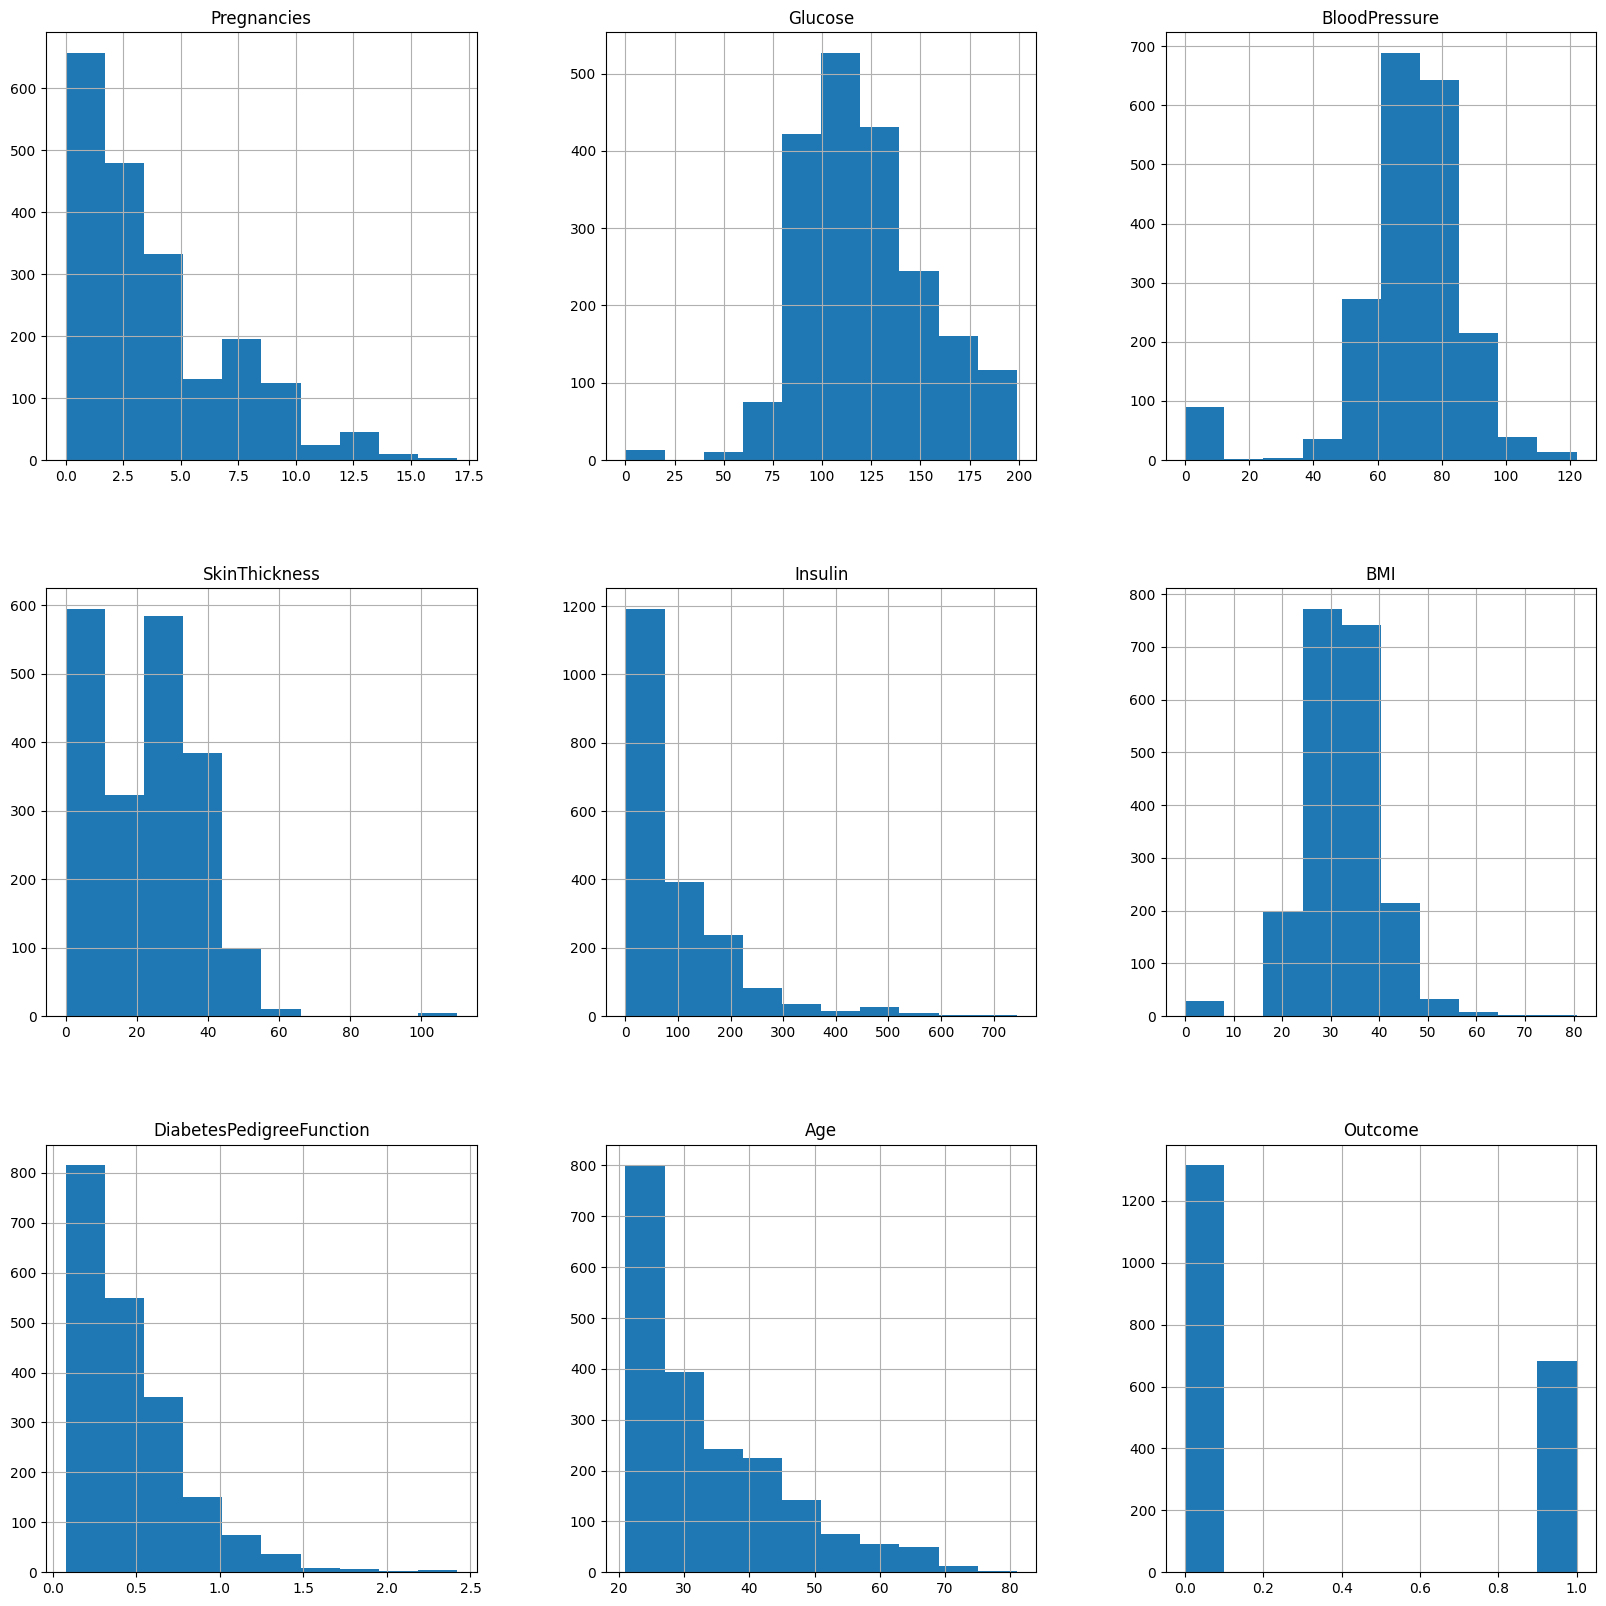

In [ ]:
diabetes.hist(figsize = (20,20))

Inference: So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

**Now we will be imputing the mean value of the column to each missing value of that particular column.**

In [ ]:
#Now we will be imputing the mean value of the column to each missing value of that particular column
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

**Plotting the distributions after removing the NAN values.**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

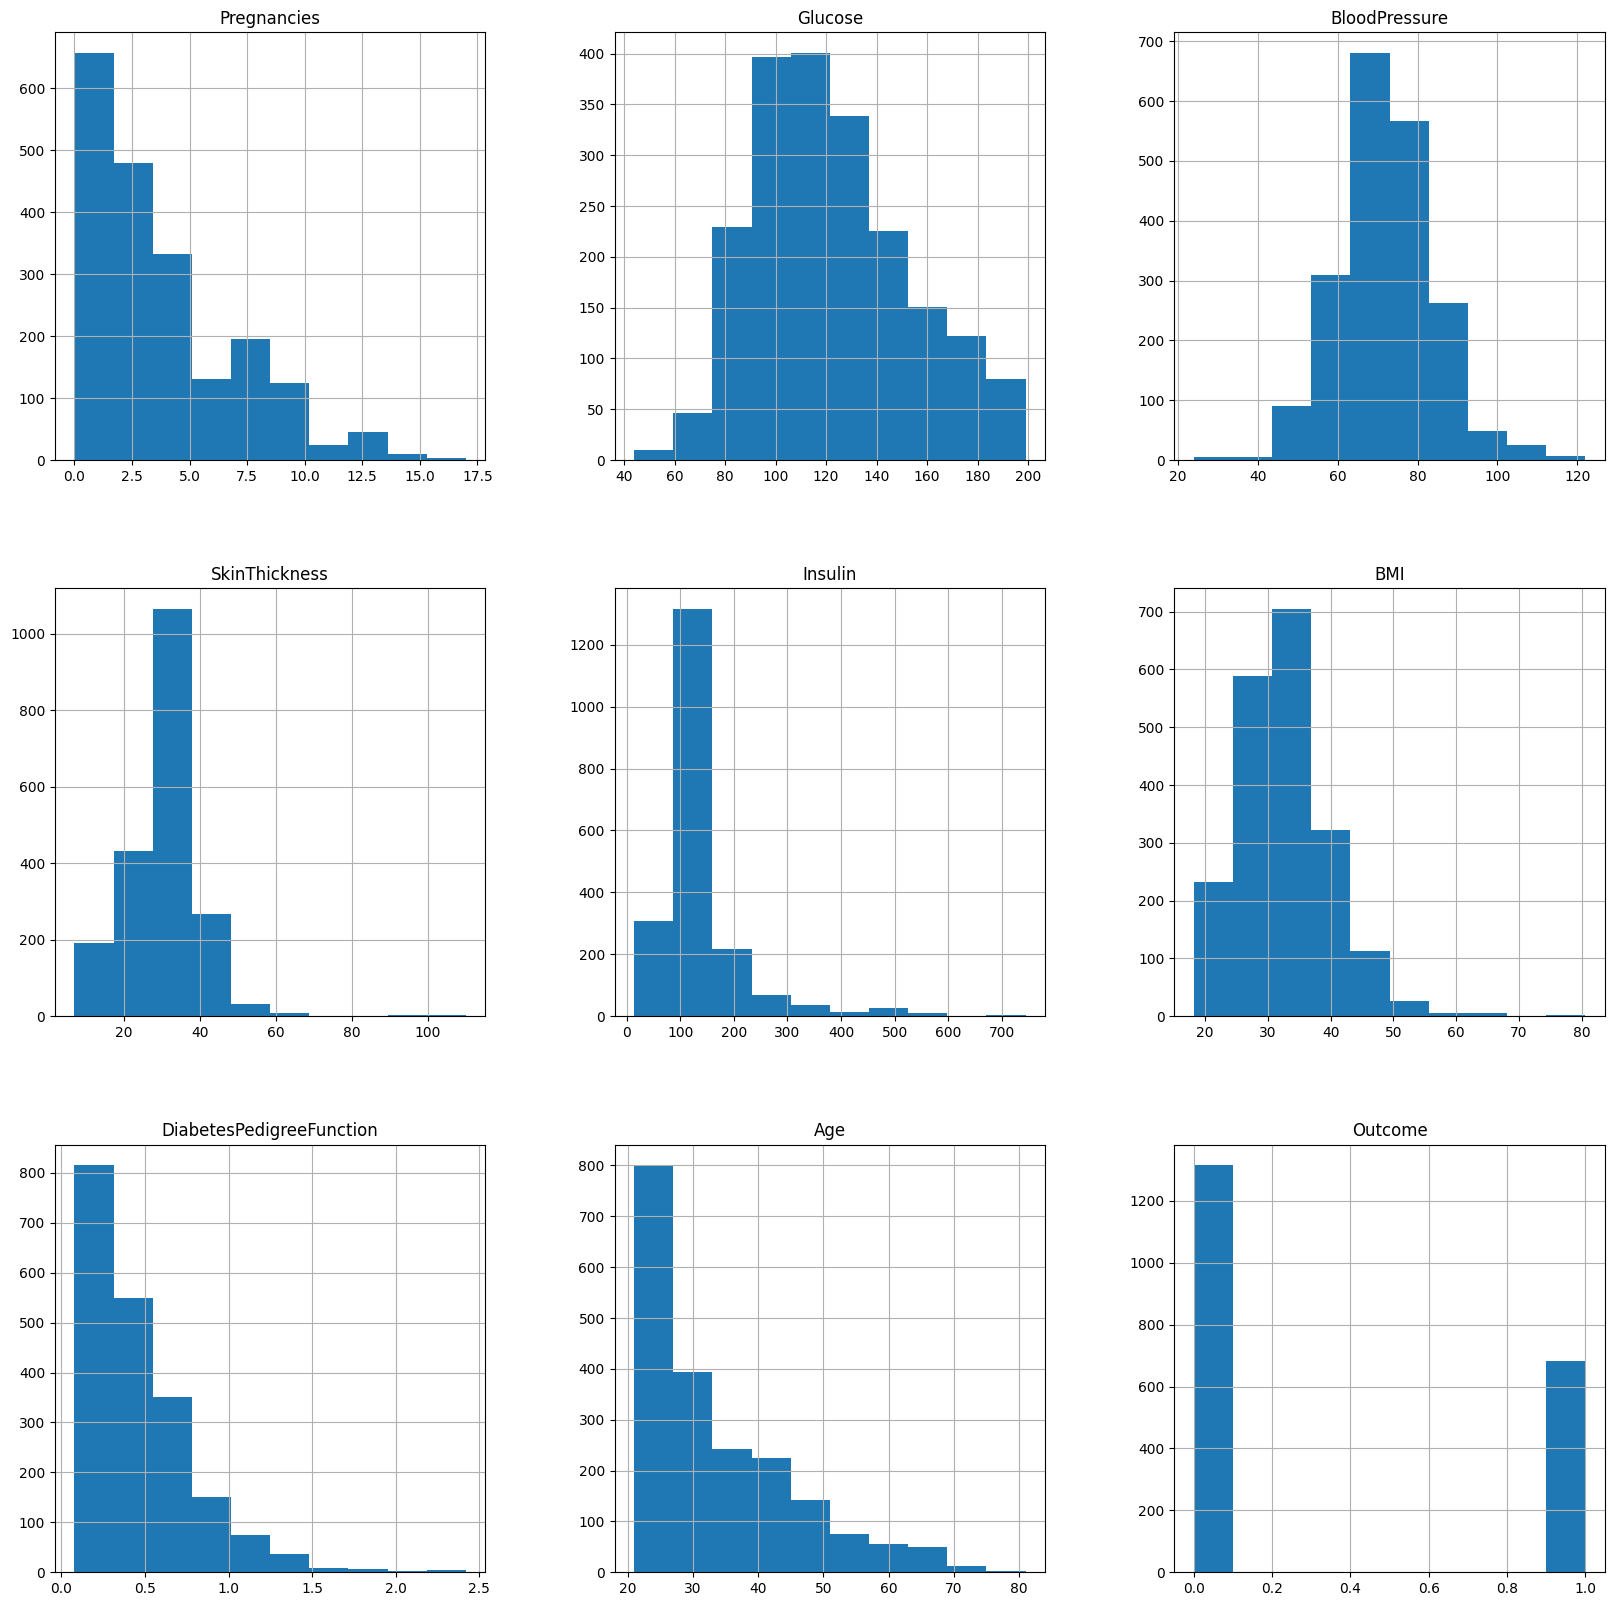

In [ ]:
diabetes_copy.hist(figsize = (20,20))

Inference: Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

**Plotting Null Count Analysis Plot**

<Axes: >

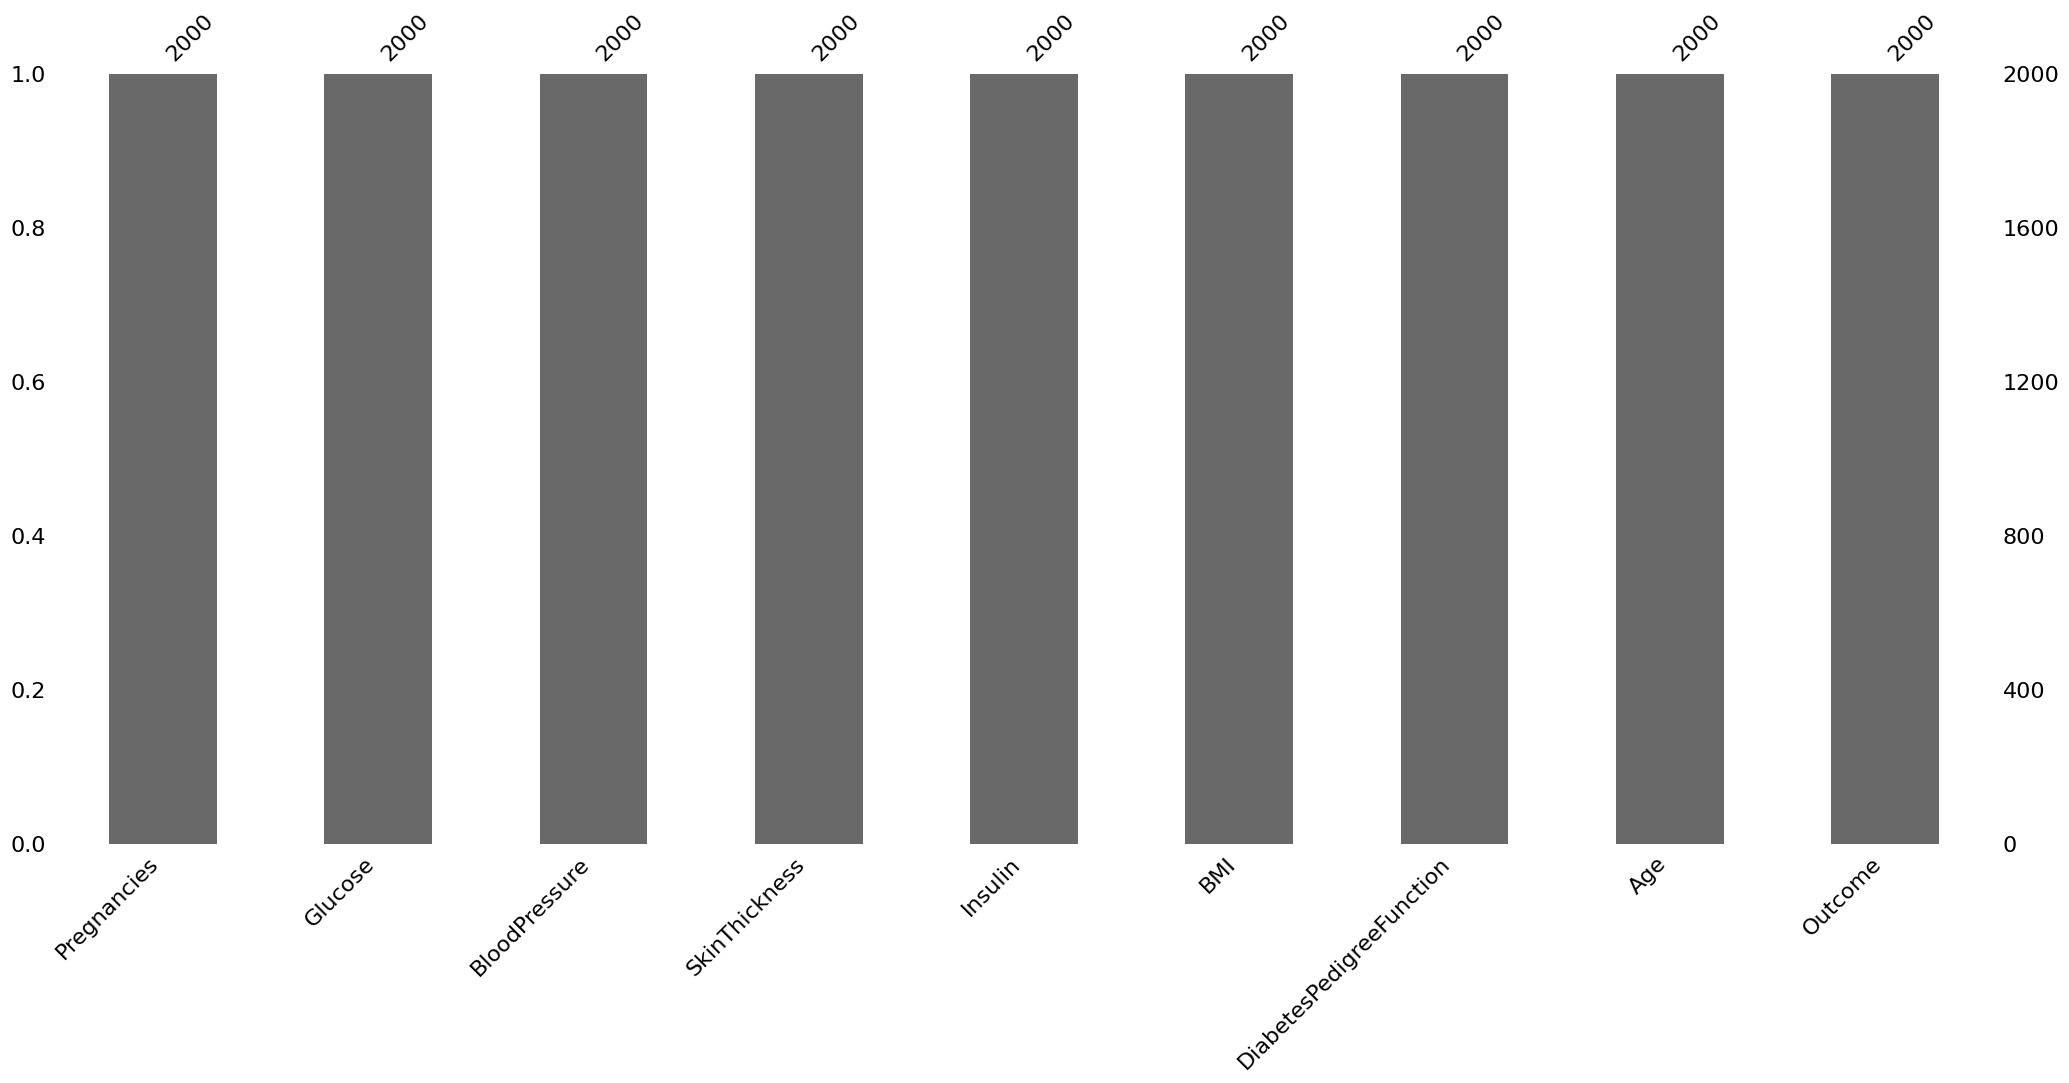

In [ ]:
#Plotting Null Count Analysis Plot
msno.bar(diabetes)

Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.

**Now, let’s check that how well our outcome column is balanced**

Outcome
0    1316
1     684
Name: count, dtype: int64


<Axes: xlabel='Outcome'>

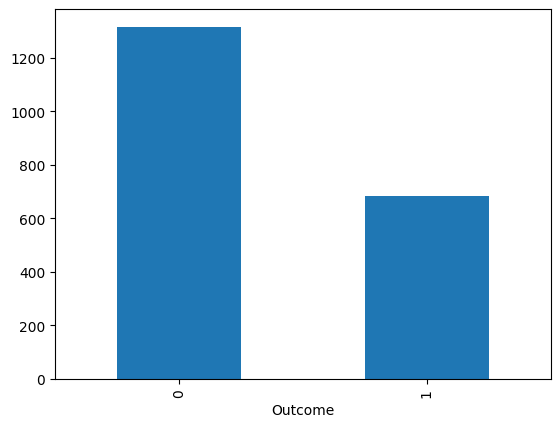

In [ ]:
#Now, let’s check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())
diabetes.Outcome.value_counts().plot(kind="bar")

Conclusion: The graph shows a bias towards data points where the outcome value is 0, meaning no diabetes. There are almost twice as many non-diabetic cases as there are diabetic ones.

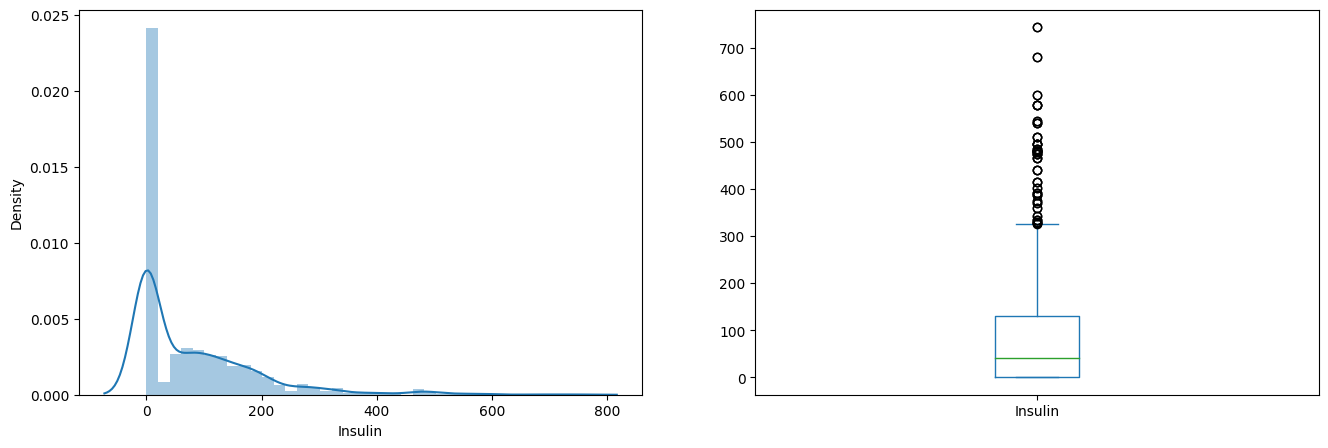

In [ ]:
#derive  outliers in insulin
plt.subplot(121)
sns.distplot(diabetes['Insulin'])
plt.subplot(122)
diabetes['Insulin'].plot.box(figsize=(16,5))
plt.show()

Inference: That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

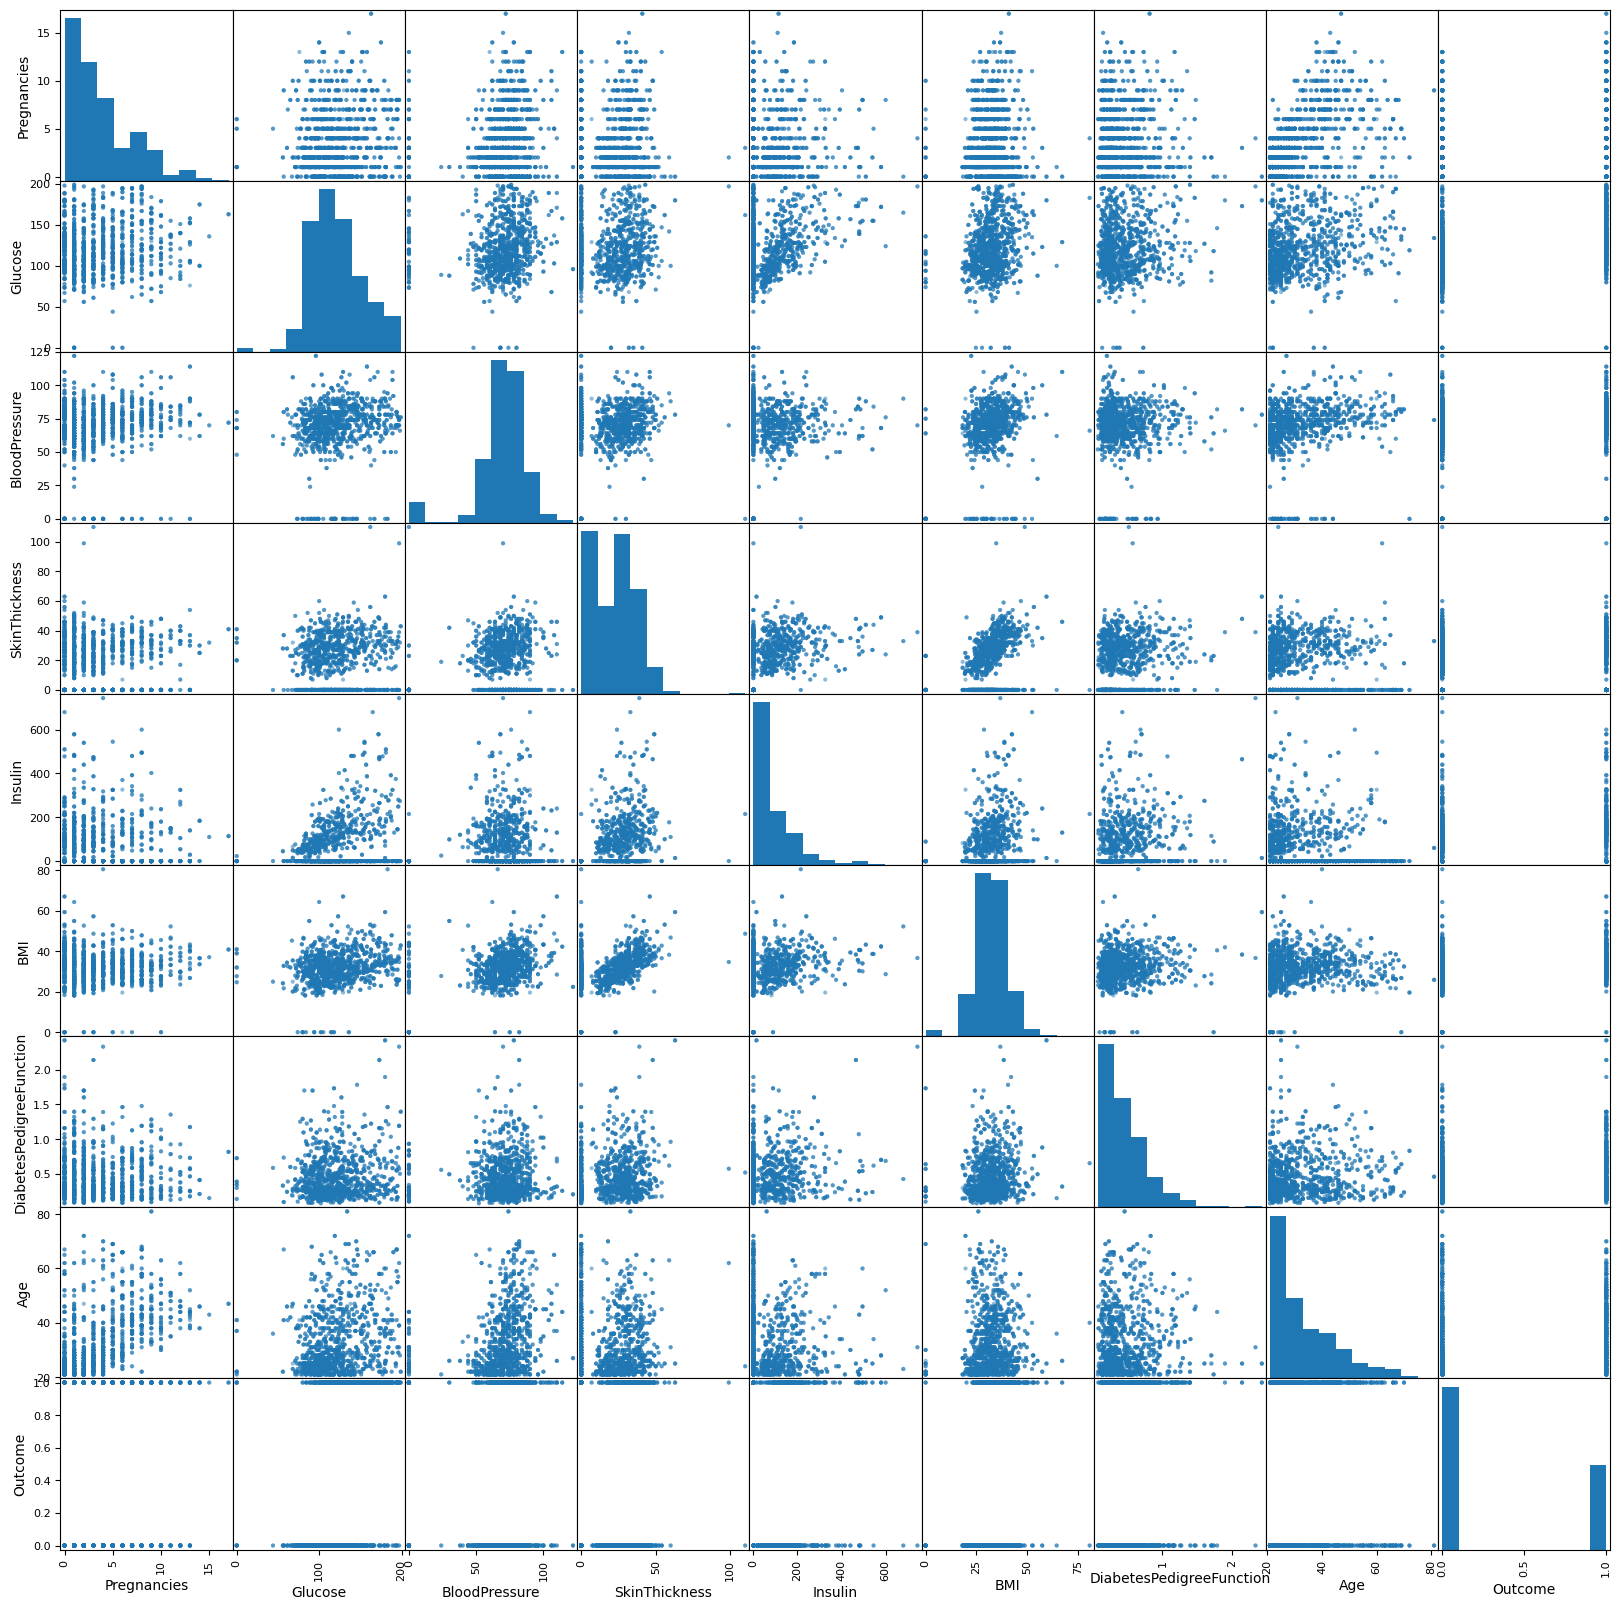

In [ ]:
#plotting a Scatter matrix of Uncleaned data
p = pd.plotting.scatter_matrix(diabetes, figsize=(20, 20))

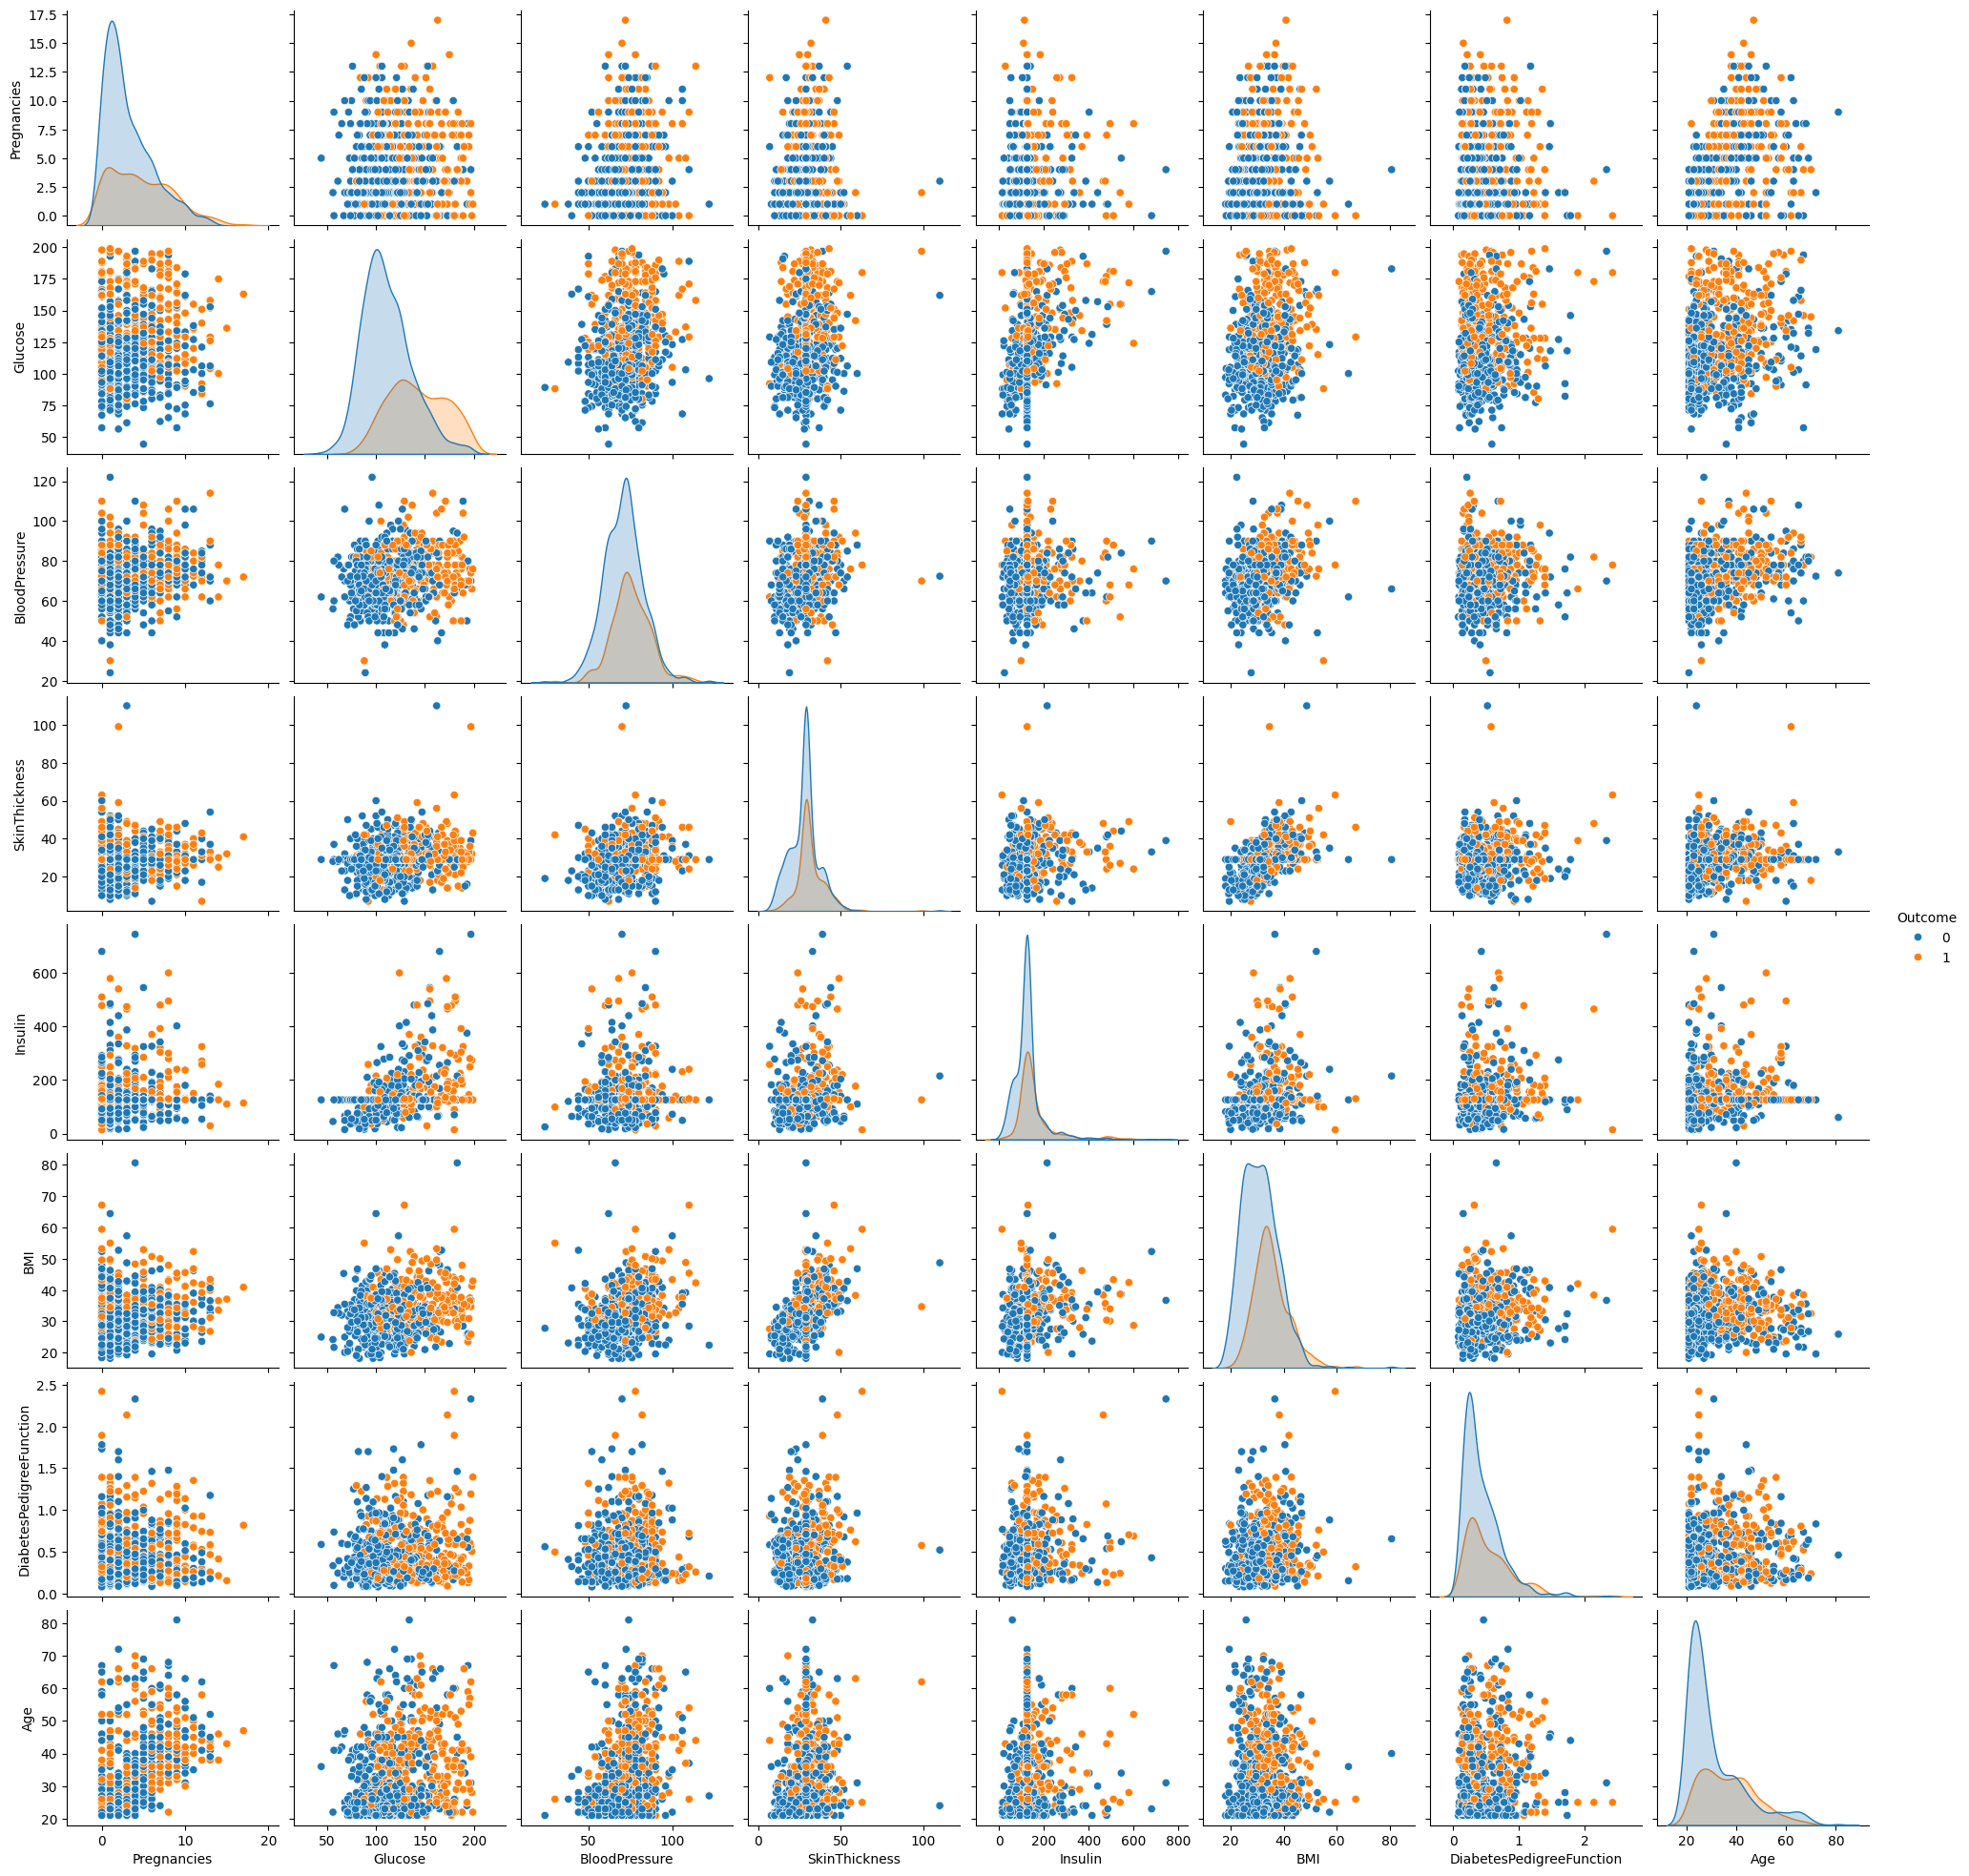

In [ ]:
# plotting the pair plots for the data
p = sns.pairplot(diabetes_copy, hue = 'Outcome')

The histogram plots reveal that the majority of parameters exhibit positive skewness, while the
outcome displays a bimodal distribution, as anticipated. Glucose and Blood Pressure are the only
parameters that closely resemble a normal distribution. To investigate the potential correlations
between parameters and diabetic/non-diabetic outcomes, a pair plot will be generated.

**Correlation between all the features**


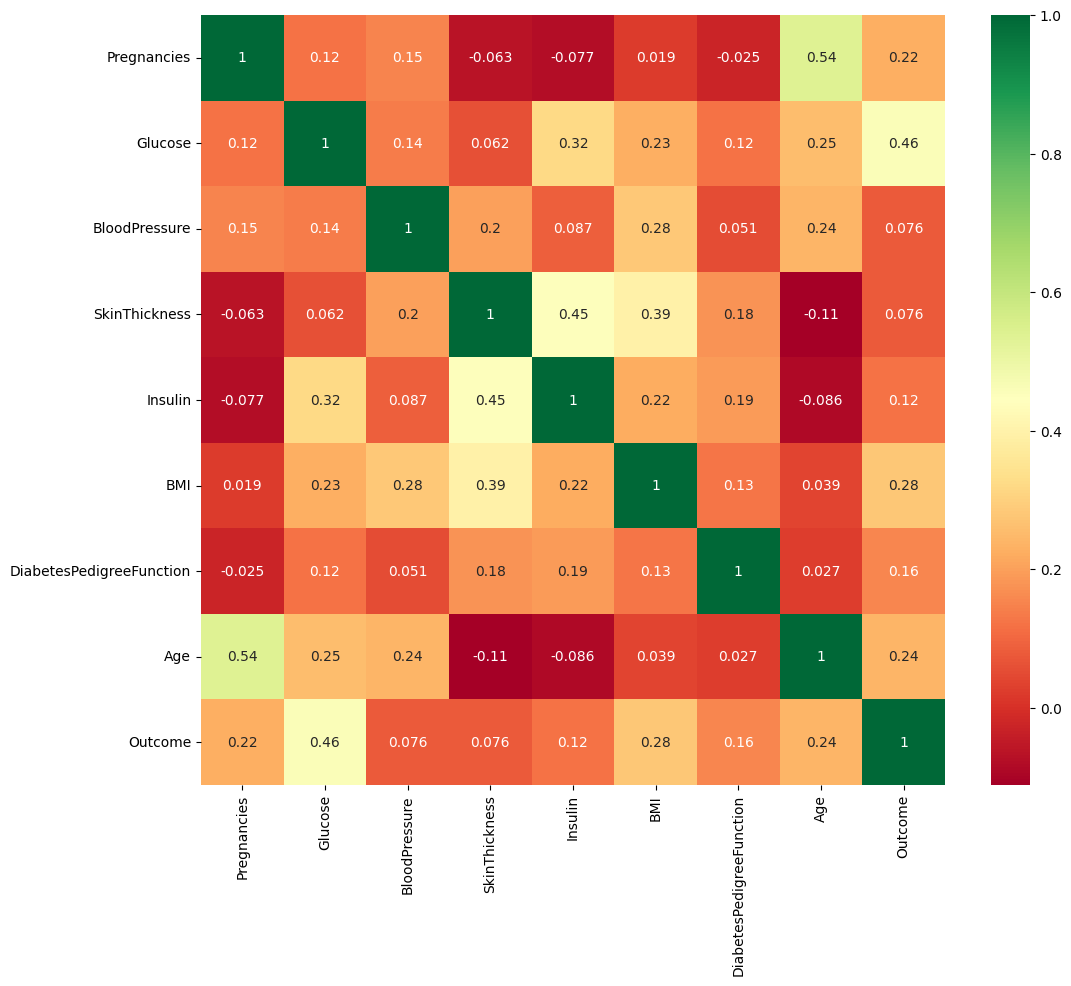

In [ ]:
#Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')

<Axes: >

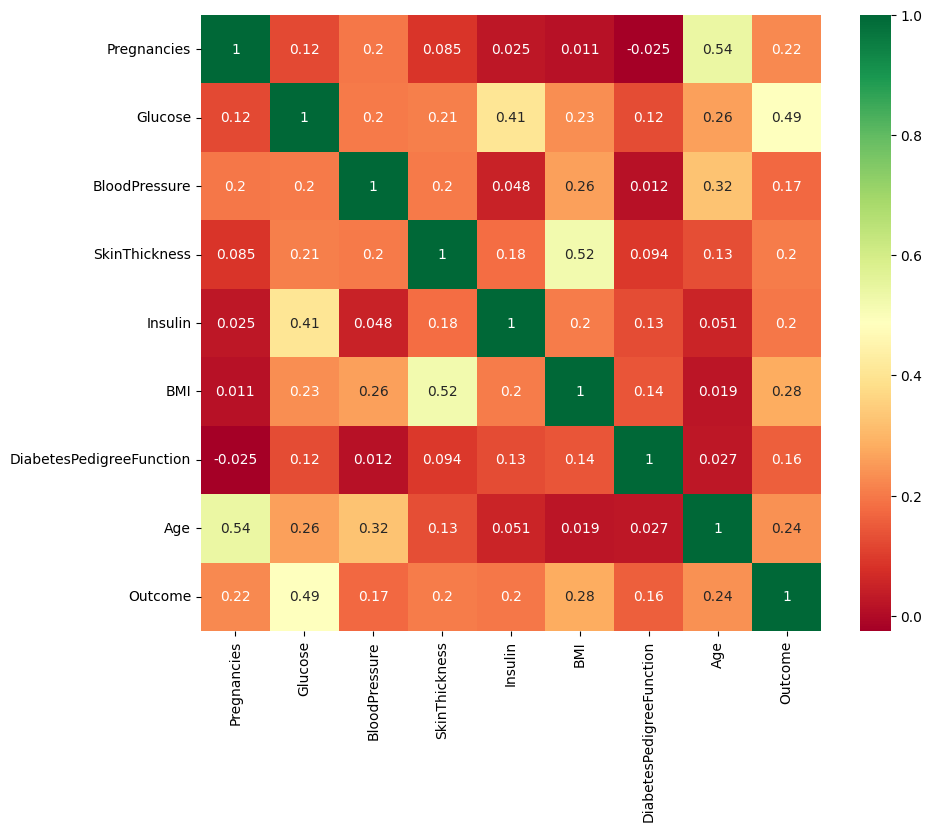

In [ ]:
#Correlation between all the features after cleaning data
plt.figure(figsize=(10,8))
# seaborn has an easy method to showcase heatmap
sns.heatmap(diabetes_copy.corr(), annot=True,cmap ='RdYlGn')

Conclusion:It is easy to see that there is no single feature that has a very high
correlation with our outcome value. Some of the features have a negative correlation
with the outcome value and some have positive.

**Scaling the Data**

**Before scaling down the data let’s have a look into it**

In [ ]:
#Before scaling down the data let’s have a look into it
diabetes_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2    138.0      62.000000           35.0    126.0  33.6   
1            0     84.0      82.000000           31.0    125.0  38.2   
2            0    145.0      72.403665           29.0    126.0  44.2   
3            0    135.0      68.000000           42.0    250.0  42.3   
4            1    139.0      62.000000           41.0    480.0  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

**After Standard scaling**

In [ ]:
#After Standard scaling
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_copy.drop(["Outcome"], axis=1),),
                  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.515394  0.524960      -0.870852       0.631010 -0.177601  0.132630   
1    -1.120495 -1.244054       0.803273       0.192542 -0.189864  0.772550   
2    -1.120495  0.754277       0.000000      -0.026692 -0.177601  1.607229   
3    -1.120495  0.426682      -0.368614       1.398329  1.343080  1.342914   
4    -0.817945  0.557720      -0.870852       1.288712  4.163696  1.120333   

   DiabetesPedigreeFunction       Age  
0                 -1.063246  1.180424  
1                 -0.735551 -0.856326  
2                  0.491759 -0.177409  
3                 -0.327478 -0.771462  
4                  0.201161 -1.026055

That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

**Let’s explore our target column**

In [ ]:
#Let’s explore our target column
y = diabetes_copy["Outcome"]
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

0--->Non-Diabetic

1--->Diabetic

**Model Building**

**Splitting the dataset**

In [ ]:
# independent features
X = diabetes.drop('Outcome', axis=1)
#dependent features
y = diabetes['Outcome']

In [ ]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                        0.233   23  
2                        0.630   31  
3                        0.365   24  
4                        0.536   21  
...                        ...  ...  
1995                     0.370   33  
1996                     0.719   36  
1997                     0.382   42  
1998                     0.319   26  
1999                     0.547   25  

[2000 rows x 8 columns]

In [ ]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

**Now we will split the data into training and testing data using the train_test_split function**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1600, 8), (1600,), (400, 8), (400,))

**Random Forest**

**Building the model using RandomForest**

In [ ]:
#Train the model
from sklearn.ensemble import RandomForestClassifier

# Set max_features to 'sqrt' instead of 'auto'
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
#model training
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

**Now after building the model let’s check the accuracy of the model on the training dataset.**

In [ ]:
from sklearn import metrics
# model predictions
y_pred = rand_clf.predict(X_test)

**Getting the accuracy score for Random Forest**

In [ ]:
# accuracy score

print(f"Training Accuracy of Random Forest Classiifier is {accuracy_score(y_train, rand_clf.predict(X_train))}")

rand_clf_acc = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy of Random Forest Classiifier is {rand_clf_acc}")

Training Accuracy of Random Forest Classiifier is 0.99875
Testing Accuracy of Random Forest Classiifier is 0.9775


**Classification report and confusion matrix of random forest model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[251   2]
 [  7 140]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       253
           1       0.99      0.95      0.97       147

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.98      0.98       400



**Decision Tree**

**Building the model using DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9775 

Confusion Matrix :- 
[[244   9]
 [  0 147]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       253
           1       0.94      1.00      0.97       147

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 50, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 50 folds for each of 960 candidates, totalling 48000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.91875


In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.971875
Test Accuracy of Decision Tree Classifier is 0.91 

Confusion Matrix :- 
[[234  19]
 [ 17 130]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       253
           1       0.87      0.88      0.88       147

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



**XgBoost classifier**

**Building model using XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)
#model training
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# model predictions
from sklearn import metrics
xgb_pred = xgb.predict(X_test)

**Getting the accuracy score for the XgBoost classifier**

In [ ]:
# accuracy score

print(f"Training Accuracy of XGBClassifier is{accuracy_score(y_train, xgb.predict(X_train))}")

xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"Test Accuracy of XGBClassifierr{xgb_acc}")

Training Accuracy of XGBClassifier is0.99375
Test Accuracy of XGBClassifierr0.965


**Classification report and confusion matrix of the XgBoost classifier**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[248   5]
 [  9 138]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       253
           1       0.97      0.94      0.95       147

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



**Support Vector Machine (SVM)**

**Building the model using Support Vector Machine (SVM)**

In [ ]:
#model training
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
# model predictions

svc_pred = svc.predict(X_test)

**Accuracy score for SVM**

In [ ]:
# accuracy score

print(f"Training Accuracy of Support vector classifier is{accuracy_score(y_train, svc.predict(X_train))}")

svc_acc = accuracy_score(y_test, svc_pred)
print(f"Testing Accuracy of support vector classifier is{svc_acc}")

Training Accuracy of Support vector classifier is0.773125
Testing Accuracy of support vector classifier is0.765


**Classification report and confusion matrix of the SVM classifie**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[231  22]
 [ 72  75]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       253
           1       0.77      0.51      0.61       147

    accuracy                           0.77       400
   macro avg       0.77      0.71      0.72       400
weighted avg       0.77      0.77      0.75       400



**Model Comparison**

In [ ]:
models = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost'],
    'Score': [100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4),
               100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

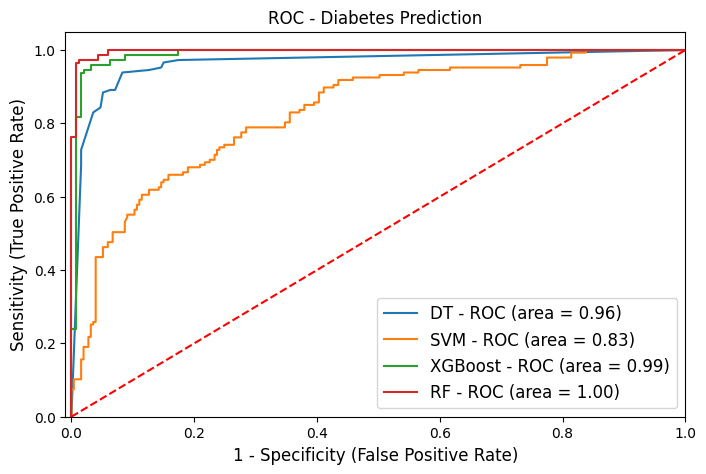

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,5))

#Initialize Classifiers:
models = [
    {
        'label': 'DT',
        'model': dtc,
    },
    {
        'label': 'SVM',
        'model': SVC(probability=True),
    },
    {
        'label': 'XGBoost',
        'model': xgb,
    },
    {
        'label': 'RF',
        'model': rand_clf,
    }
]

#Plotting ROC Curves:
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc_value = auc(fpr1, tpr1)  # Change variable name to avoid conflict
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc_value))

#Plot Random Guessing Line:
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()


This graph generates ROC curves for various classifiers trained on a dataset, allowing
for a visual comparison of their performance in binary classification tasks, like
predicting diabetes. By plotting the ROC curves and computing the Area Under the
Curve (AUC) for each classifier, it aids in assessing their discrimination ability, with
higher AUC values indicating superior performance.

Accuracy_value: [91.0, 76.5, 96.5, 97.75]
AUC_value: [94.53, 71.16, 95.95, 96.88]


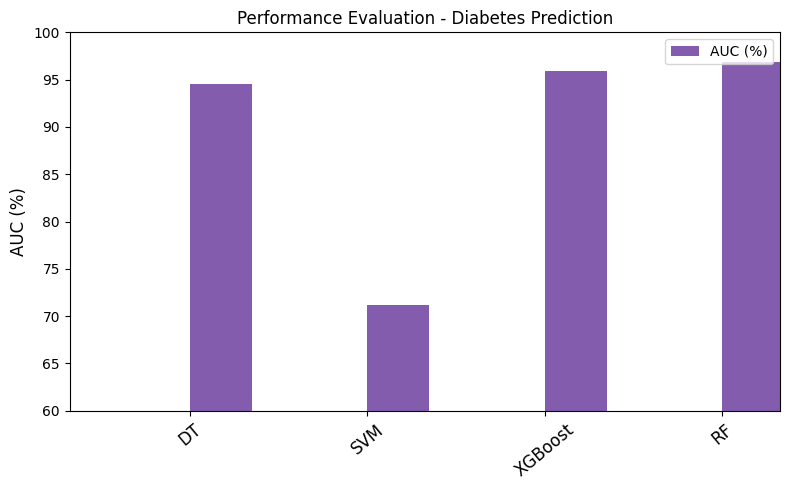

In [ ]:
#Model Initialization
models = [
    {
        'label': 'DT',
        'model': dtc,
    },
    {
        'label': 'SVM',
        'model': SVC(probability=True),
    },
    {
        'label': 'XGBoost',
        'model': xgb,
    },
    {
        'label': 'RF',
        'model': rand_clf,
    }
]

#Accuracy Calculation:
means_roc = []
means_accuracy = [100*round(dtc_acc, 4), 100*round(svc_acc, 4), 100*round(xgb_acc, 4), 100*round(rand_clf_acc, 4)]

#Model Training and ROC Calculation:
for m, accuracy in zip(models, means_accuracy):
    model = m['model']
    model.fit(X_train, y_train)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    auc = 100 * round(auc, 4)
    means_roc.append(auc)


print("Accuracy_value:", means_accuracy)
print("AUC_value:", means_roc)

# create plot
plt.figure(figsize=(8, 5))
index = np.arange(len(models))
bar_width = 0.35
opacity = 0.8

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity,
                 color='rebeccapurple',
                 label='AUC (%)')

plt.xlim([-0.5, len(models)-0.5])
plt.ylim([60, 100])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, ('DT', 'SVM', 'XGBoost', 'RF'), rotation=40, ha='center', fontsize=12)
plt.ylabel('AUC (%)', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()


This code essentially evaluates and compares the performance of different classification models based on their AUC values, providing insights into how well each model predicts diabetes.


The Conclusion from Model Building

**Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.97.**

**Feature Importance**

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

**Getting feature importances**

In [ ]:
rand_clf.feature_importances_

array([0.08089127, 0.24398483, 0.09139793, 0.07382384, 0.07427064,
       0.17235248, 0.12507942, 0.1381996 ])

From the above output, it is not much clear that which feature is important for that reason we will now make a visualization of the same.

**Plotting feature importances**

<Axes: >

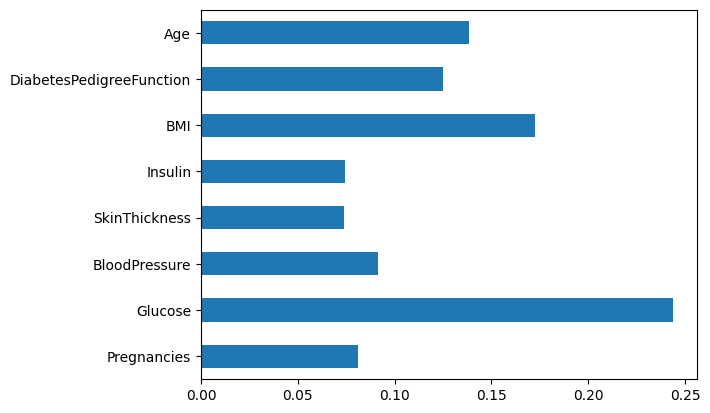

In [ ]:
(pd.Series(rand_clf.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

**Saving Model – Random Forest**

In [ ]:
import pickle

# Save the model using pickle
with open('rand_clf_model.pkl', 'wb') as file:
    pickle.dump(rand_clf, file)

# Load the saved model
with open('rand_clf_model.pkl', 'rb') as file:
    rand_clf_from_pickle = pickle.load(file)

# Make predictions using the loaded model
rand_clf_from_pickle.predict(X_test)
#predictions = rand_clf_from_pickle.predict(X_test)

# Assuming predictions are binary (0 or 1), you can convert them to "non diabetes" or "diabetes"
#predictions_labels = ["non diabetes" if pred == 0 else "diabetes" for pred in predictions]

# Print or use the predictions
#print(predictions_labels)


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

Now for the last time, I’ll be looking at the head and tail of the dataset so that we can take any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [ ]:
#display the first five rows.
diabetes_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2    138.0      62.000000           35.0    126.0  33.6   
1            0     84.0      82.000000           31.0    125.0  38.2   
2            0    145.0      72.403665           29.0    126.0  44.2   
3            0    135.0      68.000000           42.0    250.0  42.3   
4            1    139.0      62.000000           41.0    480.0  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [ ]:
#display the last five rows.
diabetes_copy.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1995            2     75.0           64.0           24.0     55.0  29.7   
1996            8    179.0           72.0           42.0    130.0  32.7   
1997            6     85.0           78.0           29.0    126.0  31.2   
1998            0    129.0          110.0           46.0    130.0  67.1   
1999            2     81.0           72.0           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0

**Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.**

In [ ]:
rand_clf.predict([[0	,135.0	,68.000000	,42.0	,250.0	,42.3	,0.365	,24]]) #3th patient

array([1])

**Another one**

In [ ]:
rand_clf.predict([[2	,81.0	,72.0	,15.0	,76.0	,30.1	,0.547	,25]])  # 1999 th patient

array([0])

**Conclusion**

By leveraging patient records, we successfully constructed a machine learning model (specifically, a random forest algorithm - identified as the most effective) capable of accurately predicting the presence of diabetes within the dataset. Additionally, our analysis included data exploration and visualization, leading to valuable insights drawn from the dataset.